#Regresión Iterativa

Lizbeth Contreras Figueroa

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datos = pd.read_csv("regLinPoli.csv")

In [3]:
datos.head()

,X,X2,X3,X4,y
0,7.317938,53.552216,1.683319,0.859736,20.716319
1,1.284357,1.649574,3.395139,0.959256,8.098008
2,97.740652,9553.235088,0.366480,-0.344100,5992.603427
3,17.753591,315.190006,-1.945300,-0.889370,199.959361
4,66.441081,4414.417290,0.504995,-0.450777,2384.624168


Se separan los datos en entrenamiento y prueba

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(datos[['X', 'X2', 'X3', 'X4']], datos['y'], train_size = 0.75)

Se definen las funciones de salida y entrenamiento

In [5]:
def salida (w0, W, X1):
    V_X = w0
    for k in range(len(W)):
        V_X = V_X + (W[k] * X1[k])
    return V_X

In [6]:
def entrena(w0, W, X, Y, nu, lamb):
    for i in range(len(X)):
        X1 = X.iloc[i]
        sal = salida(w0, W, X1)
        error = Y.iloc[i] - sal
        w0 = w0 + (nu * error)
        for j in range(len(X1)):
            W[j] = W[j] + (nu * error * X.iloc[i][j]) - (lamb * W[j])
    return w0, W

In [7]:
w0 = float(np.random.randint(-5, 5, 1))
W = list(np.random.randint(-5, 5, 4))
nu = 0.01
lam = 0.05

In [8]:
res = entrena(w0, W, X_train, Y_train, nu, lam)
res

(nan, [nan, nan, nan, nan])

Como no se transformaron los datos arroja error. Por tanto se transforman

In [9]:
X_scaler = preprocessing.StandardScaler().fit(X_train)
Y_scaler = preprocessing.StandardScaler().fit(Y_train)

In [10]:
X_scaler_p = preprocessing.StandardScaler().fit(X_test)
Y_scaler_p = preprocessing.StandardScaler().fit(Y_test)

In [11]:
Xscaler = X_scaler.transform(X_train)
Yscaler = Y_scaler.transform(Y_train)

In [12]:
Xscaler_p = X_scaler_p.transform(X_test)
Yscaler_p = Y_scaler_p.transform(Y_test)

In [13]:
Xscaler = pd.DataFrame(Xscaler)
Yscaler = pd.DataFrame(Yscaler)

In [14]:
Xscaler_p = pd.DataFrame(Xscaler_p)
Yscaler_p = pd.DataFrame(Yscaler_p)

###Regresión regularizada

In [1]:
w0 = float(np.random.randint(-10, 10, 1))
W = list(np.random.randint(-10, 10, 4))
nu = 0.01
lamb = 0.05


NameError: name 'np' is not defined

Se obtienen los resultados de los datos transformados y se obtienen los valores estimados

In [16]:
res_trans = entrena(w0, W, Xscaler, Yscaler, nu, lam)
res_trans

(0   -0.012908
 dtype: float64, [0    0.12809
  dtype: float64, 0    0.134116
  dtype: float64, 0   -0.000604
  dtype: float64, 0   -0.01558
  dtype: float64])

In [18]:
y_est_tr = float(res_trans[0]) + (Xscaler[0] * float(res_trans[1][0])) + (Xscaler[1] * float(res_trans[1][1])) +  (Xscaler[2] * float(res_trans[1][2])) + (Xscaler[3] * float(res_trans[1][3]))
y_est_tr = pd.DataFrame(y_est_tr)
y_est_tr.head()

,0
0,-0.092435
1,-0.236479
2,0.040066
3,-0.304015
4,-0.019824


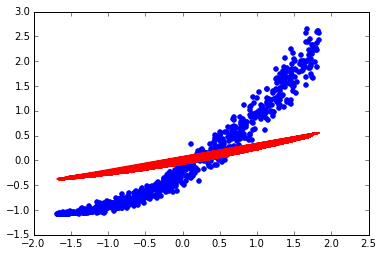

In [20]:
plt.scatter(Xscaler[0], Yscaler[0], color = 'blue')
plt.plot(Xscaler[0], y_est_tr, color = 'red', linewidth = 2)
plt.show()

Se dan diferentes valores a lambda

In [36]:
w0_i = float(np.random.randint(-5, 5, 1))
W_i = list(np.random.randint(-5, 5, 4))
nu_i = 0.01
lam1 = list(np.arange(0, 0.001, 0.00001))

In [24]:
errores = []
for i in range(len(lamb_i)):
    resu_lam = entrena(w0_i, W_i, Xscaler, Yscaler, nu_i, lamb_i[i])
    y_est_lam = float(resu_lam[0]) + (Xscaler[0] * float(resu_lam[1][0])) + (Xscaler[1] * float(resu_lam[1][1])) +  (Xscaler[2] * float(resu_lam[1][2])) + (Xscaler[3] * float(resu_lam[1][3]))
    y_est_lam = pd.DataFrame(y_est_lam)
    error_lam = np.mean((Yscaler - y_est_lam) ** 2)
    errores.insert(i, error_lam)

In [38]:
errores

[0    92.683761
 dtype: float64, 0    2111.209455
 dtype: float64, 0    47024.936382
 dtype: float64, 0    1033350.182552
 dtype: float64, 0    22353316.005048
 dtype: float64, 0    4.761883e+08
 dtype: float64, 0    9.989095e+09
 dtype: float64, 0    2.063432e+11
 dtype: float64, 0    4.197296e+12
 dtype: float64, 0    8.407455e+13
 dtype: float64, 0    1.658345e+15
 dtype: float64, 0    3.221075e+16
 dtype: float64, 0    6.160870e+17
 dtype: float64, 0    1.160375e+19
 dtype: float64, 0    2.152139e+20
 dtype: float64, 0    3.930585e+21
 dtype: float64, 0    7.069020e+22
 dtype: float64, 0    1.251919e+24
 dtype: float64, 0    2.183275e+25
 dtype: float64, 0    3.749345e+26
 dtype: float64, 0    6.340410e+27
 dtype: float64, 0    1.055830e+29
 dtype: float64, 0    1.731353e+30
 dtype: float64, 0    2.795708e+31
 dtype: float64, 0    4.445419e+32
 dtype: float64, 0    6.960624e+33
 dtype: float64, 0    1.073243e+35
 dtype: float64, 0    1.629531e+36
 dtype: float64, 0    2.436361e+37


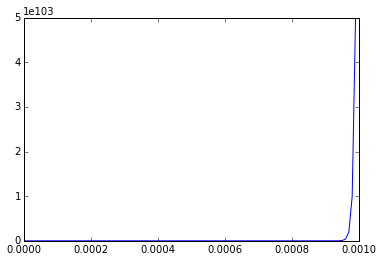

In [39]:
plt.plot(lamb_i, errores)
plt.show()

In [29]:
res2 = entrena(w0_i, W_i, Xscaler, Yscaler, nu_i, lamb_i[1])
y_est2 = float(res2[0]) + (Xscaler[0] * float(res2[1][0])) + (Xscaler[1] * float(res2[1][1])) +  (Xscaler[2] * float(res2[1][2])) + (Xscaler[3] * float(res2[1][3]))
y_est2 = pd.DataFrame(y_est2)
error2 = np.mean((Yscaler - y_est2) ** 2)
error2

0    2.243717e+106
dtype: float64

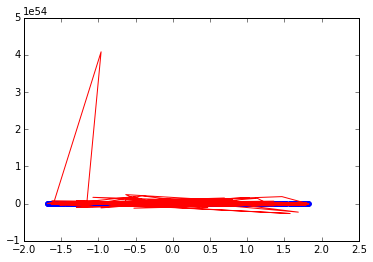

In [31]:
plt.scatter(Xscaler[0], Yscaler[0], color = 'blue')
plt.plot(Xscaler[0], y_est2, color = 'red')
plt.show()

In [32]:
res_test = entrena(w0_i, W_i, Xscaler_p, Yscaler_p, nu_i, lamb_i[1])
res_test

(0   -3.811961e+51
 dtype: float64, [0   -4.969741e+50
  dtype: float64, 0    1.637400e+51
  dtype: float64, 0    2.536255e+52
  dtype: float64, 0   -3.015314e+51
  dtype: float64])

In [33]:
y_est_p = float(res2[0]) + (Xscaler_p[0] * float(res2[1][0])) + (Xscaler_p[1] * float(res2[1][1])) +  (Xscaler_p[2] * float(res2[1][2])) + (Xscaler_p[3] * float(res2[1][3]))
y_est_p = pd.DataFrame(y_est_p)
y_est_p.head()

,0
0,9.926560e+51
1,2.354402e+51
2,8.514728e+51
3,9.103031e+51
4,9.798128e+51


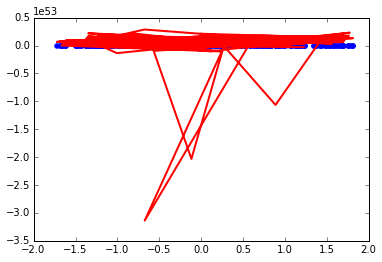

In [34]:
plt.scatter(Xscaler_p[0], Yscaler_p[0], color = 'blue')
plt.plot(Xscaler_p[0], y_est_p, color = 'red', linewidth = 2)
plt.show()